In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as p

## Takeaway Notes
Plots like these show us how important it is to understand the collection methods over the years. Around 1960ish we started mesauring smaller earthquakes more. This doesn't mean they weren't happening prior to this date. It's much easier to trace evidence of larger earthquakes from the past and estimate magnitudes since they leave traces of damage.

It's also worth noting that the Richter scale wasn't even developed until 1935, so our findings prior to the last 50 years or so need to be looked at with that context.

The major benefit of having these plots is that we can use our other visualizations to view the damages in notable years we find here.

In [2]:
earthquake_df = p.read_csv('cleaned_earthquake_data.csv')
earthquake_df

,X,Y,OBJECTID,Mag,Long,Lat,Depth,Year,Mo,Day,...,MAG_UU,MAGUU_Flag,ML_UU,Mc_UU,NPH,GAP,DMIN,RMS,ERH,ERZ
0,-12445218.50,4916540.070,1139,0.000000,-111.7973,40.3473,7.0,1974,11,3,...,0,,,0,5,178,13.8,0.57,5.3,20.9
1,-12507379.30,5162971.934,1535,0.000000,-112.3557,42.0133,7.1,1975,8,16,...,0,,,0,10,252,19.1,0.22,2.1,1.1
2,-12413425.65,4968999.553,1793,0.000000,-111.5117,40.7055,7.0,1976,2,4,...,0,,,0,6,226,16.6,0.22,1.9,6.3
3,-12499342.04,5146714.645,1908,0.000000,-112.2835,41.9047,7.0,1976,3,20,...,0,,,0,7,149,18.9,0.12,0.7,4.5
4,-12507468.36,5135727.471,1976,0.000000,-112.3565,41.8312,7.0,1976,4,7,...,0,,,0,6,154,28.1,0.07,1.3,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31495,-12550715.98,5096932.386,207,5.890994,-112.7450,41.5710,8.5,1934,3,12,...,,,,,,,,,,
31496,-12526192.30,5170391.233,1232,6.019454,-112.5247,42.0628,8.7,1975,3,28,...,6,W,6,,11,159,33.3,0.13,1.1,5.4
31497,-12636988.59,4494028.415,80,6.341000,-113.5200,37.3930,0.0,1902,11,17,...,,,,,,,,,,
31498,-12556281.96,5109886.384,204,6.591344,-112.7950,41.6580,8.5,1934,3,12,...,,,,,,,,,,


In [3]:
earthquake_df.corr()

,X,Y,OBJECTID,Mag,Long,Lat,Depth,Year,Mo,Day,Hr,Min_,Sec,SigM,Round
X,1.000000,0.253240,-0.043318,-0.028095,1.000000,0.257258,0.076914,-0.034001,0.025662,-0.013790,0.025062,-0.004212,0.002369,0.009290,-0.066700
Y,0.253240,1.000000,-0.241618,-0.233496,0.253240,0.999960,0.014050,-0.194406,0.023272,0.015488,-0.007022,-0.004770,0.004754,-0.062368,-0.084928
OBJECTID,-0.043318,-0.241618,1.000000,-0.166810,-0.043318,-0.242069,0.112637,0.915030,-0.004396,-0.004304,0.002599,0.013963,0.032319,-0.259797,-0.151813
Mag,-0.028095,-0.233496,-0.166810,1.000000,-0.028095,-0.234202,-0.121190,-0.260396,-0.036651,-0.001827,0.014883,-0.009588,-0.051729,0.625462,0.511833
Long,1.000000,0.253240,-0.043318,-0.028095,1.000000,0.257258,0.076914,-0.034001,0.025662,-0.013790,0.025062,-0.004212,0.002369,0.009290,-0.066700
Lat,0.257258,0.999960,-0.242069,-0.234202,0.257258,1.000000,0.013560,-0.194701,0.023427,0.015291,-0.006667,-0.004768,0.004760,-0.062875,-0.085645
Depth,0.076914,0.014050,0.112637,-0.121190,0.076914,0.013560,1.000000,0.130556,0.018641,-0.003113,-0.026032,0.002799,0.031402,-0.109806,0.087553
Year,-0.034001,-0.194406,0.915030,-0.260396,-0.034001,-0.194701,0.130556,1.000000,-0.033621,0.000370,0.012465,0.031319,0.091484,-0.481931,-0.237033
Mo,0.025662,0.023272,-0.004396,-0.036651,0.025662,0.023427,0.018641,-0.033621,1.000000,-0.002039,-0.000777,0.010505,-0.006497,-0.002426,-0.003170
Day,-0.013790,0.015488,-0.004304,-0.001827,-0.013790,0.015291,-0.003113,0.000370,-0.002039,1.000000,-0.000302,-0.002429,0.010119,-0.002799,0.000641


In [4]:
earthquake_df.cov()

,X,Y,OBJECTID,Mag,Long,Lat,Depth,Year,Mo,Day,Hr,Min_,Sec,SigM,Round
X,6.220158e+09,4.848287e+09,-3.151274e+07,-1646.594183,55876.632602,33950.395451,27716.965631,-40949.036693,6966.189083,-9577.029714,13884.096808,-5782.015458,3269.402156,54.207606,-26.932265
Y,4.848287e+09,5.892659e+10,-5.410055e+08,-42120.430032,43552.906575,406175.038512,15584.169885,-720639.020161,19444.600114,33106.910462,-11973.403179,-20150.863744,20193.693541,-1120.114428,-105.548129
OBJECTID,-3.151274e+07,-5.410055e+08,8.508129e+07,-1143.394828,-283.083763,-3736.204147,4747.213823,128885.798693,-139.552595,-349.635148,168.389436,2241.597216,5216.266867,-177.293317,-7.169236
Mag,-1.646594e+03,-4.212043e+04,-1.143395e+03,0.552223,-0.014792,-0.291222,-0.411496,-2.954909,-0.093746,-0.011959,0.077684,-0.124000,-0.672639,0.034387,0.001947
Long,5.587663e+04,4.355291e+04,-2.830838e+02,-0.014792,0.501948,0.304982,0.248986,-0.367851,0.062578,-0.086032,0.124723,-0.051941,0.029370,0.000487,-0.000242
Lat,3.395040e+04,4.061750e+05,-3.736204e+03,-0.291222,0.304982,2.799950,0.103676,-4.975029,0.134924,0.225312,-0.078355,-0.138847,0.139376,-0.007784,-0.000734
Depth,2.771697e+04,1.558417e+04,4.747214e+03,-0.411496,0.248986,0.103676,20.877584,9.109402,0.293174,-0.125275,-0.835481,0.222567,2.510631,-0.037120,0.002048
Year,-4.094904e+04,-7.206390e+05,1.288858e+05,-2.954909,-0.367851,-4.975029,9.109402,233.187371,-1.767133,0.049732,1.337061,8.323481,24.444893,-0.544477,-0.018531
Mo,6.966189e+03,1.944460e+04,-1.395526e+02,-0.093746,0.062578,0.134924,0.293174,-1.767133,11.847191,-0.061812,-0.018793,0.629316,-0.391316,-0.000618,-0.000056
Day,-9.577030e+03,3.310691e+04,-3.496351e+02,-0.011959,-0.086032,0.225312,-0.125275,0.049732,-0.061812,77.545533,-0.018680,-0.372306,1.559155,-0.001824,0.000029


In [5]:
# Calculate avg magnitudes by year
years = earthquake_df.Year.drop_duplicates().sort_values().values
avg_mags = []
for year in years:
    avg_mags.append(earthquake_df.where(earthquake_df.Year == year).dropna().Mag.mean())

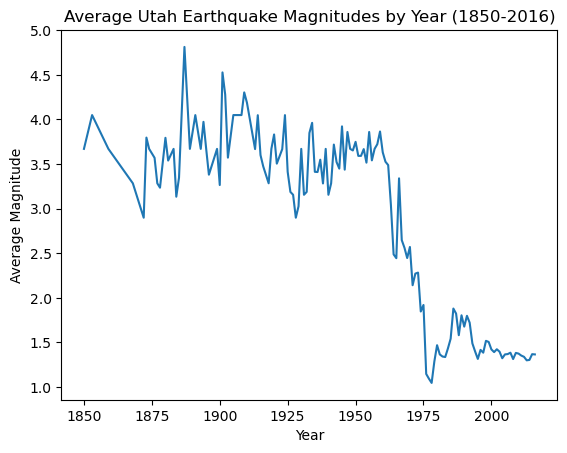

In [6]:
# Plot avg magnitudes by year
plt.figure()
plt.title("Average Utah Earthquake Magnitudes by Year (1850-2016)")
plt.ylabel("Average Magnitude")
plt.xlabel("Year")
plt.plot(years, avg_mags)

In [7]:
# Calculate max magnitudes by year
max_mags = []
sig_quakes = [[],[]]
for year in years:
    mags = earthquake_df.where(earthquake_df.Year == year).dropna().Mag
    max_mag = mags.max()
    max_mags.append(max_mag)
    for mag in mags:
        if mag > 5.4:
            sig_quakes[0].append(year)
            sig_quakes[1].append(mag)
    

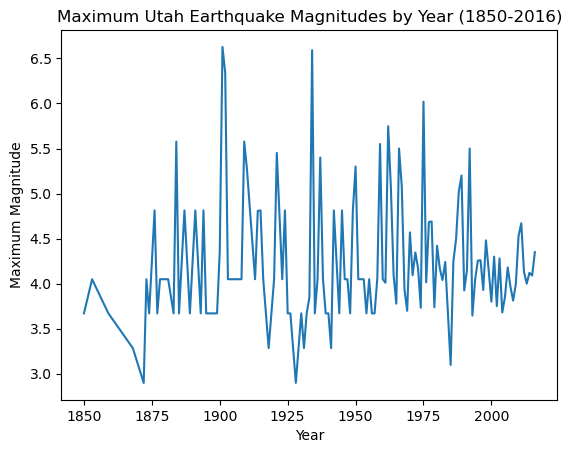

In [8]:
# Plot max magnitudes by year
plt.figure()
plt.title("Maximum Utah Earthquake Magnitudes by Year (1850-2016)")
plt.ylabel("Maximum Magnitude")
plt.xlabel("Year")
plt.plot(years, max_mags)

In [21]:
quake_count = []
for year in years:
    quake_count.append(earthquake_df.where(earthquake_df.Year == year).dropna().OBJECTID.count())

In [25]:
most_quakes = max(quake_count)
most_quakes_index = quake_count.index(most_quakes)
most_quakes_year = years[most_quakes_index]
print(most_quakes, most_quakes_index, most_quakes_year)

1009 130 2013


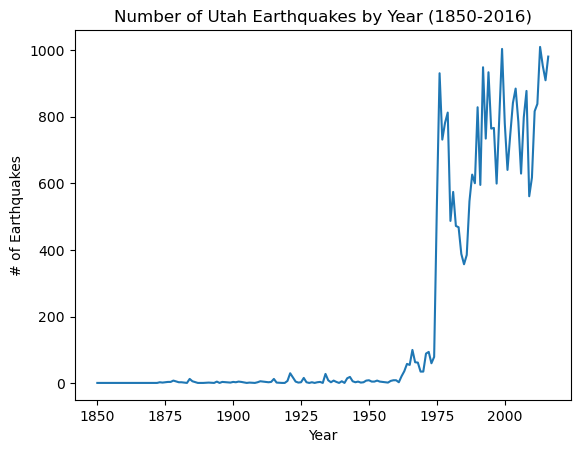

In [22]:
# Plot quake_count by year
plt.figure()
plt.title("Number of Utah Earthquakes by Year (1850-2016)")
plt.ylabel("# of Earthquakes")
plt.xlabel("Year")
plt.plot(years, quake_count)

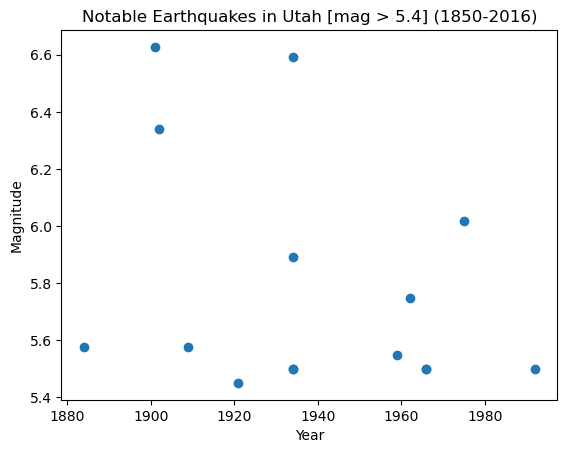

In [10]:
plt.figure()
plt.title("Notable Earthquakes in Utah [mag > 5.4] (1850-2016)")
plt.ylabel("Magnitude")
plt.xlabel("Year")
plt.scatter(sig_quakes[0], sig_quakes[1])

In [11]:
# Calculate count by classification for all years
classifications = ['Not felt < 2.5', 'Minor damage 2.5-5.4', 'Slight damage 5.5-6.0', 'Lots of damage 6.1-6.9', 'Serious damage 7.0-7.9', 'Destroys communities > 8.0']
counts = [0, 0, 0, 0, 0, 0]
for mag in earthquake_df.Mag.values:
    if mag <= 2.5:
        counts[0] += 1
    elif mag <= 5.4:
        counts[1] += 1
    elif mag <= 6.0:
        counts[2] += 1
    elif mag <= 6.9:
        counts[3] += 1
    elif mag <= 7.9:
        counts[4] += 1
    else:
        counts[5] += 1

In [12]:
classifications

['Not felt < 2.5',
 'Minor damage 2.5-5.4',
 'Slight damage 5.5-6.0',
 'Lots of damage 6.1-6.9',
 'Serious damage 7.0-7.9',
 'Destroys communities > 8.0']

In [13]:
counts

[28742, 2743, 11, 4, 0, 0]

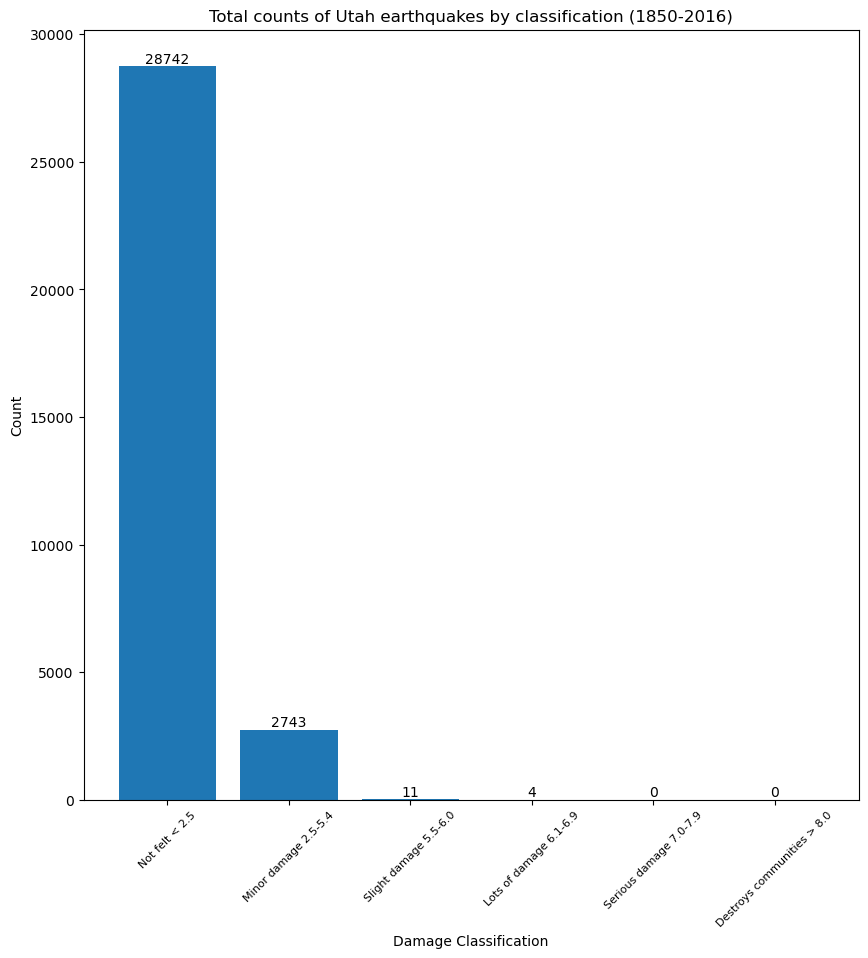

In [14]:
# Plot count by classification for all years

fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Total counts of Utah earthquakes by classification (1850-2016)")
plt.ylabel("Count")
plt.xlabel("Damage Classification")
plt.xticks(rotation=45, fontsize=8)

bars = ax.bar(classifications, counts)
labels = ax.bar_label(bars)

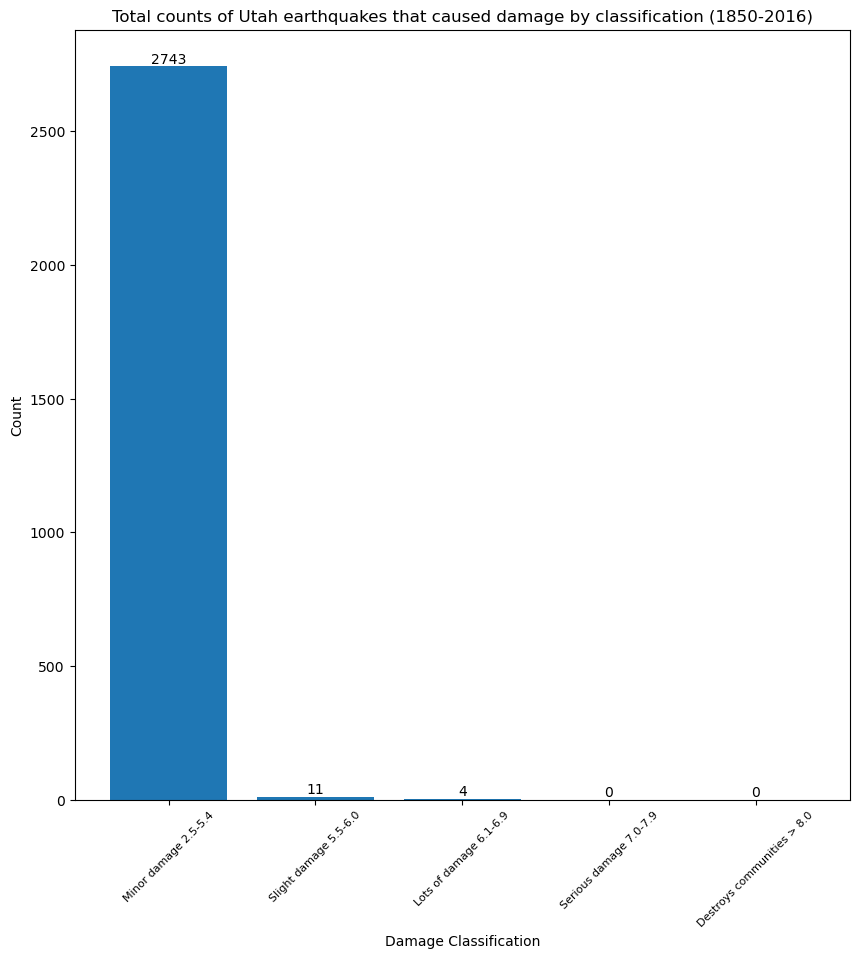

In [15]:
# Plot counts only for mags that cause damage 

fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Total counts of Utah earthquakes that caused damage by classification (1850-2016)")
plt.ylabel("Count")
plt.xlabel("Damage Classification")
plt.xticks(rotation=45, fontsize=8)

bars = ax.bar(classifications[1:], counts[1:])
labels = ax.bar_label(bars)


In [16]:
def get_damage_per_mag(mag):
    if mag == 0.0:
        return 1
    elif mag <= 2.5:
        return 316
    elif mag <= 5.4:
        return 251189
    elif mag <= 6:
        return 1000000
    elif mag <= 6.9:
        return 7943282
    elif mag <= 7.9:
        return 79432823
    else:
        return 10000000000
    
quake_count = {'Q1': [], 'Q2': [], 'Q3': [], 'Q4': []}
total_damage = {'Q1': [], 'Q2': [], 'Q3': [], 'Q4': []}
max_mags = {'Q1': [], 'Q2': [], 'Q3': [], 'Q4': []}
avg_mags = {'Q1': [], 'Q2': [], 'Q3': [], 'Q4': []}
for year in years:
    quakes_q1 = earthquake_df[(earthquake_df.Year == year) & (earthquake_df.Long > -111.55) & (earthquake_df.Lat > 39.5)].dropna()
    quakes_q2 = earthquake_df[(earthquake_df.Year == year) & (earthquake_df.Long < -111.55) & (earthquake_df.Lat > 39.5)].dropna()
    quakes_q3 = earthquake_df[(earthquake_df.Year == year) & (earthquake_df.Long < -111.55) & (earthquake_df.Lat < 39.5)].dropna()
    quakes_q4 = earthquake_df[(earthquake_df.Year == year) & (earthquake_df.Long > -111.55) & (earthquake_df.Lat < 39.5)].dropna()
    
    # Q1
    quake_count['Q1'].append(quakes_q1.OBJECTID.count())
    mags_q1 = quakes_q1.Mag.values
    if np.any(mags_q1):
        total_damage['Q1'].append(sum([get_damage_per_mag(mag) for mag in mags_q1]))
        avg_mags['Q1'].append(mags_q1.mean())
        max_mags['Q1'].append(max(mags_q1))
    else:
        total_damage['Q1'].append(0)
        avg_mags['Q1'].append(0)
        max_mags['Q1'].append(0)
        
    # Q2
    quake_count['Q2'].append(quakes_q2.OBJECTID.count())
    mags_q2 = quakes_q2.Mag.values
    if np.any(mags_q2):
        total_damage['Q2'].append(sum([get_damage_per_mag(mag) for mag in mags_q2]))
        avg_mags['Q2'].append(mags_q2.mean())
        max_mags['Q2'].append(max(mags_q2))
    else:
        total_damage['Q2'].append(0)
        avg_mags['Q2'].append(0)
        max_mags['Q2'].append(0)
        
    # Q3
    quake_count['Q3'].append(quakes_q3.OBJECTID.count())
    mags_q3 = quakes_q3.Mag.values
    if np.any(mags_q3):
        total_damage['Q3'].append(sum([get_damage_per_mag(mag) for mag in mags_q3]))
        avg_mags['Q3'].append(mags_q3.mean())
        max_mags['Q3'].append(max(mags_q3))
    else:
        total_damage['Q3'].append(0)
        avg_mags['Q3'].append(0)
        max_mags['Q3'].append(0)
    
    # Q4
    quake_count['Q4'].append(quakes_q4.OBJECTID.count())
    mags_q4 = quakes_q4.Mag.values
    if np.any(mags_q4):
        total_damage['Q4'].append(sum([get_damage_per_mag(mag) for mag in mags_q4]))
        avg_mags['Q4'].append(mags_q4.mean())
        max_mags['Q4'].append(max(mags_q4))
    else:
        total_damage['Q4'].append(0)
        avg_mags['Q4'].append(0)
        max_mags['Q4'].append(0)

        

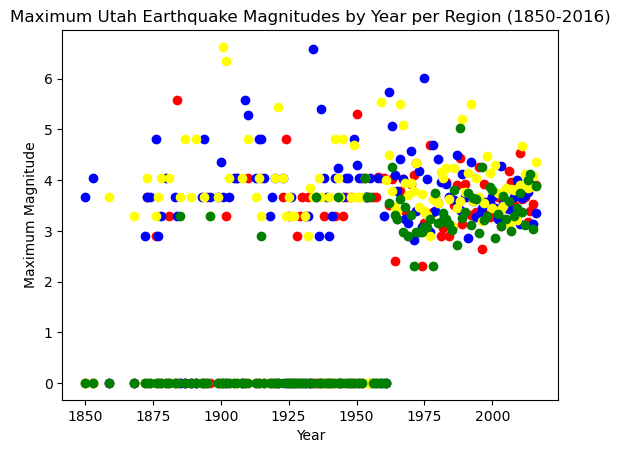

In [17]:
# Plot max magnitudes by year
plt.figure()
plt.title("Maximum Utah Earthquake Magnitudes by Year per Region (1850-2016)")
plt.ylabel("Maximum Magnitude")
plt.xlabel("Year")
plt.scatter(years, max_mags['Q1'], color='red')
plt.scatter(years, max_mags['Q2'], color='blue')
plt.scatter(years, max_mags['Q3'], color='yellow')
plt.scatter(years, max_mags['Q4'], color='green')


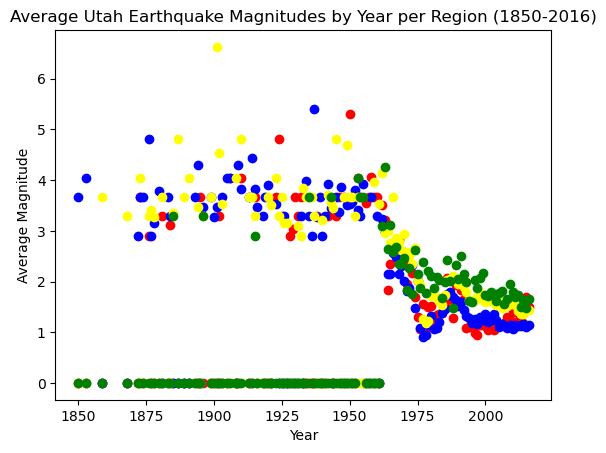

In [18]:
# Plot max magnitudes by year
plt.figure()
plt.title("Average Utah Earthquake Magnitudes by Year per Region (1850-2016)")
plt.ylabel("Average Magnitude")
plt.xlabel("Year")
plt.scatter(years, avg_mags['Q1'], color='red')
plt.scatter(years, avg_mags['Q2'], color='blue')
plt.scatter(years, avg_mags['Q3'], color='yellow')
plt.scatter(years, avg_mags['Q4'], color='green')


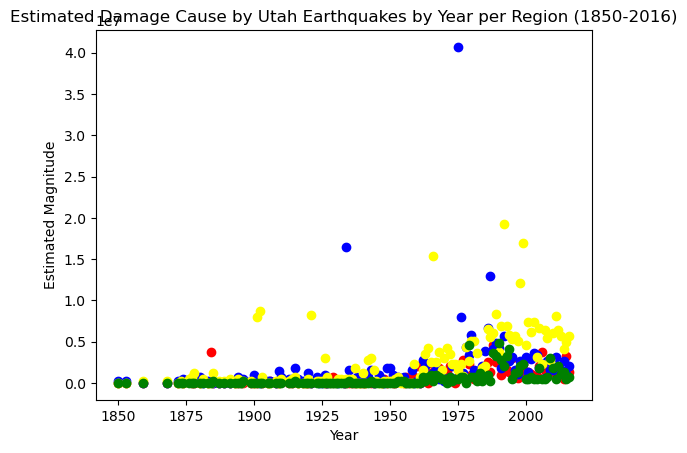

In [19]:
# Plot max magnitudes by year
plt.figure()
plt.title("Estimated Damage Cause by Utah Earthquakes by Year per Region (1850-2016)")
plt.ylabel("Estimated Magnitude")
plt.xlabel("Year")
plt.scatter(years, total_damage['Q1'], color='red')
plt.scatter(years, total_damage['Q2'], color='blue')
plt.scatter(years, total_damage['Q3'], color='yellow')
plt.scatter(years, total_damage['Q4'], color='green')


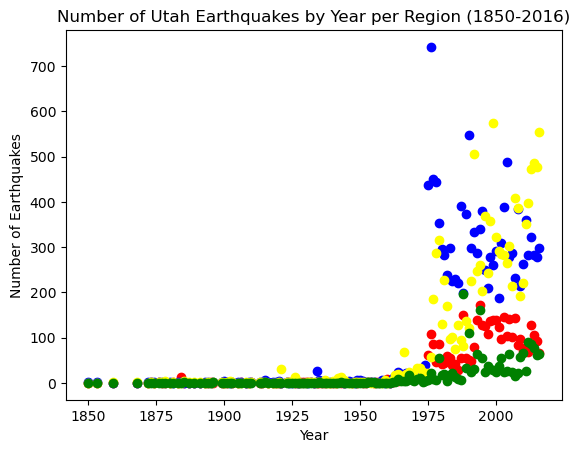

In [20]:
# Plot max magnitudes by year
plt.figure()
plt.title("Number of Utah Earthquakes by Year per Region (1850-2016)")
plt.ylabel("Number of Earthquakes")
plt.xlabel("Year")
plt.scatter(years, quake_count['Q1'], color='red')
plt.scatter(years, quake_count['Q2'], color='blue')
plt.scatter(years, quake_count['Q3'], color='yellow')
plt.scatter(years, quake_count['Q4'], color='green')
